In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt
import urllib
import requests
import matplotlib as plt
import pysal as ps
from pysal.contrib.viz import mapping as maps

#s = json.load( open(os.getenv('PUI2017')+'/fbb_matplotlibrc.json') )
#pl.rcParams.update(s)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
os.environ["PUIDATA"] = "%s/PUIDATA"%os.getenv("HOME")
os.getenv("PUIDATA")

'/nfshome/mb6203/PUIDATA'

In [3]:
url = "https://data.cityofnewyork.us/api/geospatial/nqwf-w8eh?method=export&format=Shapefile"
urllib.request.urlretrieve(url, "building_footprints.gz")

('building_footprints.gz', <http.client.HTTPMessage at 0x7ff604175e10>)

In [4]:
url = "https://data.cityofnewyork.us/api/geospatial/uyj8-7rv5?method=export&format=Shapefile"
urllib.request.urlretrieve(url, "sandy_flooding.gz")

('sandy_flooding.gz', <http.client.HTTPMessage at 0x7ff60418a0b8>)

In [5]:
!unzip -d $PUIDATA building_footprints.gz

Archive:  building_footprints.gz
  inflating: /nfshome/mb6203/PUIDATA/geo_export_d8dbce18-b7bb-4eb9-aa26-a536feed947d.dbf  
  inflating: /nfshome/mb6203/PUIDATA/geo_export_d8dbce18-b7bb-4eb9-aa26-a536feed947d.shp  
  inflating: /nfshome/mb6203/PUIDATA/geo_export_d8dbce18-b7bb-4eb9-aa26-a536feed947d.shx  
  inflating: /nfshome/mb6203/PUIDATA/geo_export_d8dbce18-b7bb-4eb9-aa26-a536feed947d.prj  


In [7]:
building_footprints = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/" + 
                                     "geo_export_d8dbce18-b7bb-4eb9-aa26-a536feed947d.shp")

In [8]:
!unzip -d $PUIDATA sandy_flooding.gz

Archive:  sandy_flooding.gz
  inflating: /nfshome/mb6203/PUIDATA/geo_export_2d1ab1e8-4418-412f-a851-ae3f09e98779.dbf  
  inflating: /nfshome/mb6203/PUIDATA/geo_export_2d1ab1e8-4418-412f-a851-ae3f09e98779.shp  
  inflating: /nfshome/mb6203/PUIDATA/geo_export_2d1ab1e8-4418-412f-a851-ae3f09e98779.shx  
  inflating: /nfshome/mb6203/PUIDATA/geo_export_2d1ab1e8-4418-412f-a851-ae3f09e98779.prj  


In [10]:
sandy_inundation = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/" + 
                                     "geo_export_2d1ab1e8-4418-412f-a851-ae3f09e98779.shp")

In [11]:
sandy_inundation.to_crs(epsg = 2263)

,comments,demsource,id,sourcedata,state,status,verified,geometry
0,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes,"POLYGON ((918494.3204023563 128523.0344150182,..."
1,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes,"POLYGON ((948808.1951745546 138356.7160142442,..."
2,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes,"POLYGON ((1009053.4671187 160146.5724301831, 1..."
3,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes,"POLYGON ((975521.3722046744 160027.0881553463,..."
4,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes,"POLYGON ((989512.6535724178 160750.1734172711,..."
5,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes,"POLYGON ((929175.3457833237 162998.1087822329,..."
6,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes,"POLYGON ((978709.1000845159 162173.3835905792,..."
7,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes,"POLYGON ((1005845.933700612 160948.2034866641,..."
8,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes,"POLYGON ((1003521.649572811 163468.7269562408,..."
9,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes,"POLYGON ((1052659.1517473 161019.5320925256, 1..."


In [12]:
building_footprints.head()

,bin,cnstrct_yr,doitt_id,feat_code,groundelev,heightroof,date_lstmo,time_lstmo,lststatype,name,shape_area,shape_len,geometry
0,4441987.0,1993.0,1283366.0,2100.0,70.0,21.540000,2017-12-19,00:00:00.000,Constructed,None,1089.812313,166.785929,POLYGON ((-73.81023637428498 40.72623326367574...
1,4518072.0,1920.0,964744.0,5110.0,6.0,16.381832,2017-08-17,00:00:00.000,Constructed,None,329.898503,77.673856,POLYGON ((-73.86002815218995 40.57354222487876...
2,4299860.0,1940.0,547717.0,2100.0,8.0,26.795523,2017-08-22,00:00:00.000,Constructed,None,1234.856322,146.929814,POLYGON ((-73.76711333552652 40.61130961765306...
3,4516837.0,1930.0,861127.0,5110.0,29.0,11.358426,2017-08-17,00:00:00.000,Constructed,None,275.411758,68.476327,POLYGON ((-73.74704802666373 40.60410892416903...
4,4301765.0,1931.0,288652.0,2100.0,6.0,26.632714,2017-08-22,00:00:00.000,Constructed,None,1420.221189,208.893121,POLYGON ((-73.77058283711517 40.59512166364137...


In [13]:
building_footprints.shape

(1084073, 13)

In [14]:
building_footprints.columns

Index(['bin', 'cnstrct_yr', 'doitt_id', 'feat_code', 'groundelev',
       'heightroof', 'date_lstmo', 'time_lstmo', 'lststatype', 'name',
       'shape_area', 'shape_len', 'geometry'],
      dtype='object')

In [15]:
building_footprints.drop(['doitt_id', 'feat_code',
       'heightroof', 'date_lstmo', 'time_lstmo', 'lststatype', 'name'], axis=1, inplace=True)

In [16]:
building_footprints.head()

,bin,cnstrct_yr,groundelev,shape_area,shape_len,geometry
0,4441987.0,1993.0,70.0,1089.812313,166.785929,POLYGON ((-73.81023637428498 40.72623326367574...
1,4518072.0,1920.0,6.0,329.898503,77.673856,POLYGON ((-73.86002815218995 40.57354222487876...
2,4299860.0,1940.0,8.0,1234.856322,146.929814,POLYGON ((-73.76711333552652 40.61130961765306...
3,4516837.0,1930.0,29.0,275.411758,68.476327,POLYGON ((-73.74704802666373 40.60410892416903...
4,4301765.0,1931.0,6.0,1420.221189,208.893121,POLYGON ((-73.77058283711517 40.59512166364137...


# Sample of our Data #
## This file is huge! ##

In [17]:
small_buildingfootprints = building_footprints.sample(frac=0.02)

In [18]:
small_buildingfootprints.head()

,bin,cnstrct_yr,groundelev,shape_area,shape_len,geometry
396812,3237842.0,1930.0,8.0,891.683739,131.628187,POLYGON ((-73.90599925072098 40.61724548989995...
781007,4287734.0,1940.0,19.0,766.750151,121.033804,POLYGON ((-73.74414558722133 40.66446236577017...
362997,1051247.0,1929.0,28.0,5015.398834,377.230188,POLYGON ((-73.94535223932735 40.77497145034216...
409685,4286153.0,1967.0,9.0,9460.185322,394.562408,"POLYGON ((-73.7666456970086 40.65867062242373,..."
459206,5034975.0,2005.0,32.0,2341.001819,218.342333,POLYGON ((-74.16155879432762 40.60670449879982...


In [19]:
small_buildingfootprints.to_crs(epsg = 2263)

,bin,cnstrct_yr,groundelev,shape_area,shape_len,geometry
396812,3237842.0,1930.0,8.0,891.683739,131.628187,"POLYGON ((1010346.954355806 164169.5618026592,..."
781007,4287734.0,1940.0,19.0,766.750151,121.033804,"POLYGON ((1055231.239258978 181461.6118641529,..."
362997,1051247.0,1929.0,28.0,5015.398834,377.230188,"POLYGON ((999385.7351365702 221624.5282573379,..."
409685,4286153.0,1967.0,9.0,9460.185322,394.562408,"POLYGON ((1048994.710065394 179334.0944656649,..."
459206,5034975.0,2005.0,32.0,2341.001819,218.342333,"POLYGON ((939390.1799310618 160356.5700848314,..."
707677,3419775.0,1925.0,17.0,217.797949,61.145075,"POLYGON ((1005424.019647897 165970.2035425798,..."
794650,4544573.0,1940.0,69.0,412.341440,81.247850,"POLYGON ((1033046.732775059 203963.0196171685,..."
178383,3422475.0,1925.0,28.0,190.637177,58.128177,"POLYGON ((1001295.920948731 170053.3941950854,..."
22131,4445336.0,1952.0,51.0,15539.742766,811.640795,"POLYGON ((1031771.665115221 213965.1131299949,..."
269310,4159165.0,1940.0,103.0,1006.412411,148.086789,"POLYGON ((1050326.534501478 214011.7268819096,..."


In [20]:
small_buildingfootprints.shape

(21681, 6)

(905477.74421447597,
 1074847.2100537424,
 112493.96319629483,
 280449.56719375844)

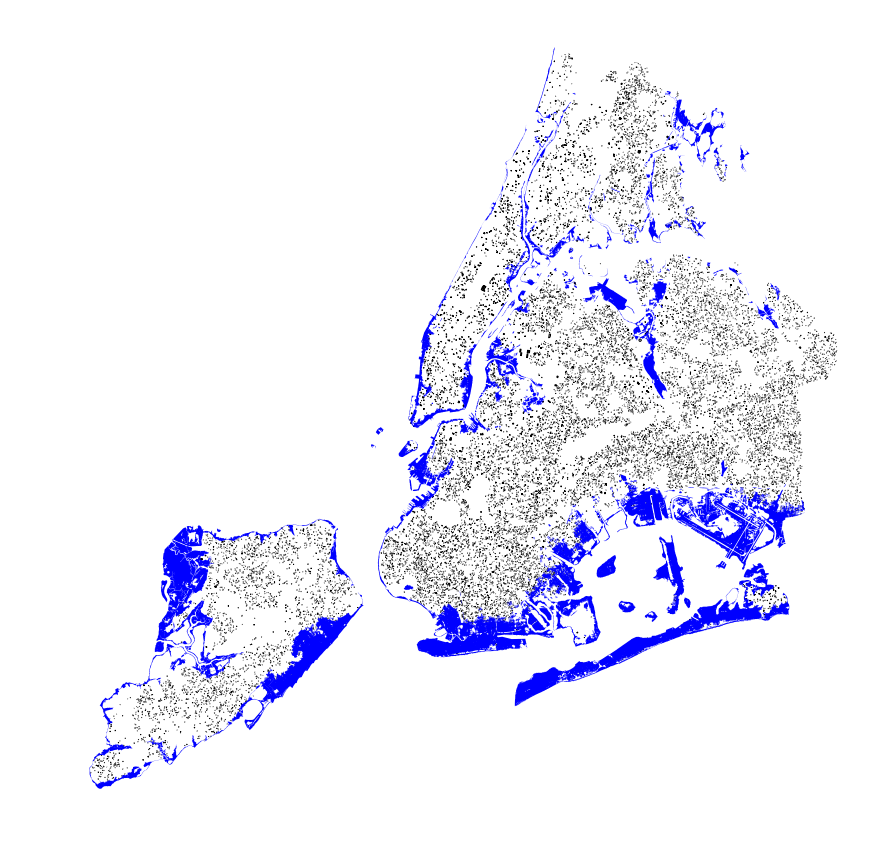

In [21]:
ax = small_buildingfootprints.to_crs(epsg=2263).plot(figsize=(20,15), color='white', edgecolor='black');

sandy_inundation.to_crs(epsg=2263).plot(ax=ax, color='blue');
plt.axis('off')

# Idea for the Project: Hurricane Sandy and Flooding in NYC #
**Figure 1: Sandy Inundation and Building Footprints.**

### Elevation = Adjacent Ground Elevation ###

In [22]:
small_buildingfootprints_dataframe = pd.DataFrame(small_buildingfootprints.drop(['geometry', 'shape_len', 'shape_area', 'bin'], axis=1))

In [23]:
small_buildingfootprints_dataframe.head()

,cnstrct_yr,groundelev
396812,1930.0,8.0
781007,1940.0,19.0
362997,1929.0,28.0
409685,1967.0,9.0
459206,2005.0,32.0


In [25]:
#small_buildingfootprints_dataframe.

Text(0.5,1,'Scatter Plot of Construction Year vs. Elevation')

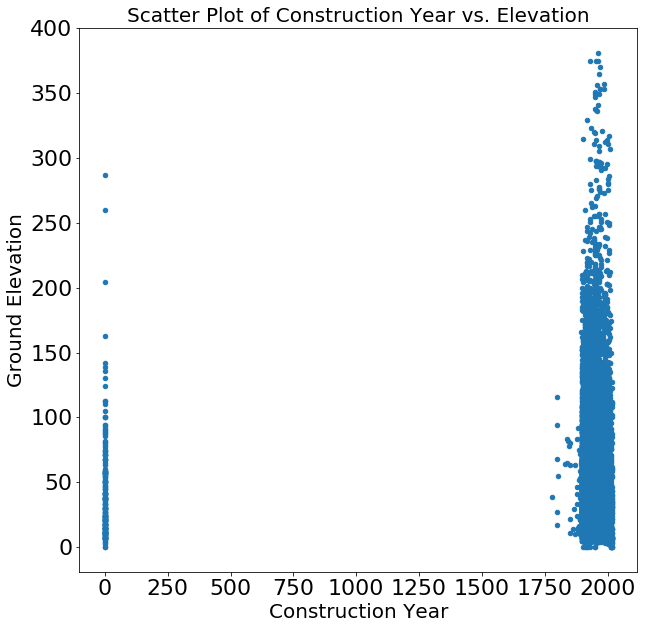

In [26]:
ax = small_buildingfootprints_dataframe.plot(kind='scatter',x='cnstrct_yr',y='groundelev',
                     marker='o', figsize=(10, 10), fontsize=22)
yl = ax.set_ylabel("Ground Elevation", fontsize=20)
xl = ax.set_xlabel("Construction Year", fontsize=20)
ax.set_title('Scatter Plot of Construction Year vs. Elevation', fontsize=20)

**Figure 2: Construction Year vs. Building Elevation. Interesting to see the buildings before 1900. Nothing terribly stands out here.**

In [27]:
#We need to remove those ZERO values

In [28]:
small_buildingfootprints_dataframe = small_buildingfootprints_dataframe[(small_buildingfootprints_dataframe != 0).all(1)]

Text(0.5,1,'Scatter Plot of Construction Year vs. Elevation')

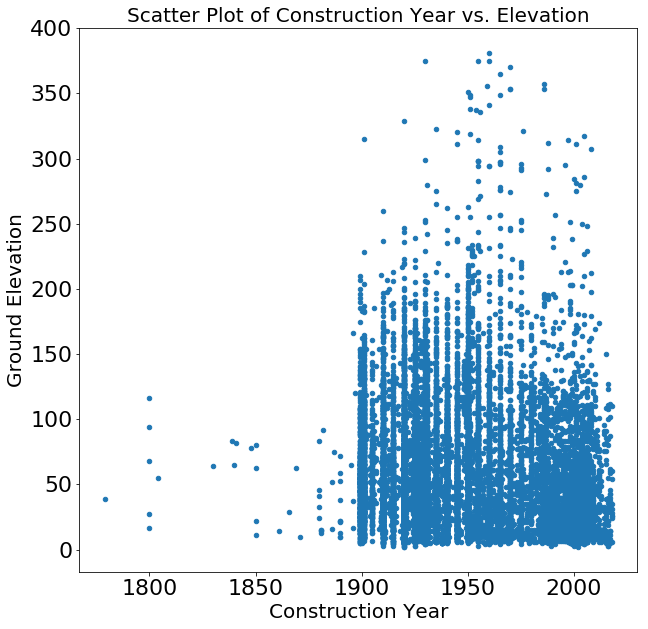

In [29]:
ax = small_buildingfootprints_dataframe.plot(kind='scatter',x='cnstrct_yr',y='groundelev',
                     marker='o', figsize=(10, 10), fontsize=22)
yl = ax.set_ylabel("Ground Elevation", fontsize=20)
xl = ax.set_xlabel("Construction Year", fontsize=20)
ax.set_title('Scatter Plot of Construction Year vs. Elevation', fontsize=20)

**Figure 3: Construction Year vs. Building Elevation. Removed zeros.**

In [30]:
#NYC's flood maps were officially developed by FEMA in ~1983. Let's analyze buildings constructed after this date.

Text(0.5,1,'Scatter Plot of Construction Year vs. Elevation after 1983')

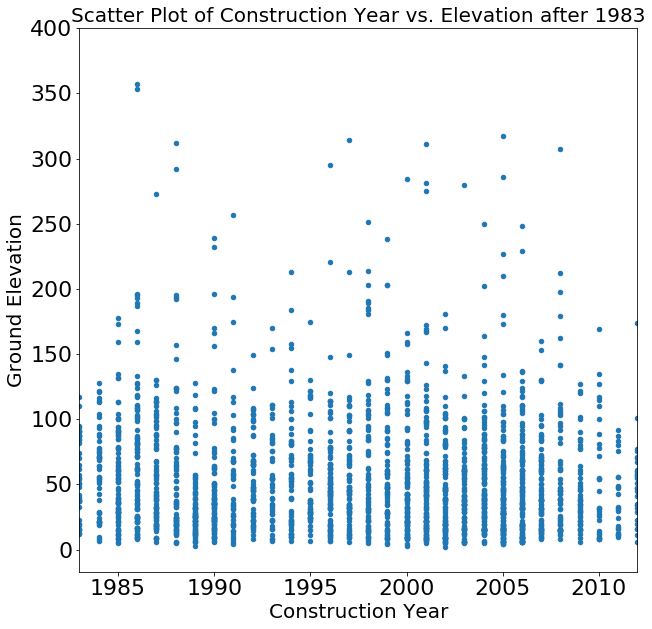

In [31]:
ax = small_buildingfootprints_dataframe.plot(kind='scatter',x='cnstrct_yr',y='groundelev',
                     marker='o', figsize=(10, 10), xlim=(1983,2012), fontsize=22)
yl = ax.set_ylabel("Ground Elevation", fontsize=20)
xl = ax.set_xlabel("Construction Year", fontsize=20)
ax.set_title('Scatter Plot of Construction Year vs. Elevation after 1983', fontsize=20)


**Figure 4: Construction Year vs. Building Elevation. NYC's flood maps were officially developed by FEMA in ~1983. Let's analyze buildings constructed after this date. Perhaps new maps make the city build on higher ground.**

In [32]:
#Still crowded. Let's analyze buildings below 20ft.

Text(0.5,1,'Scatter Plot of Construction Year vs. Elevation\nafter 1983 and below 20ft elevation')

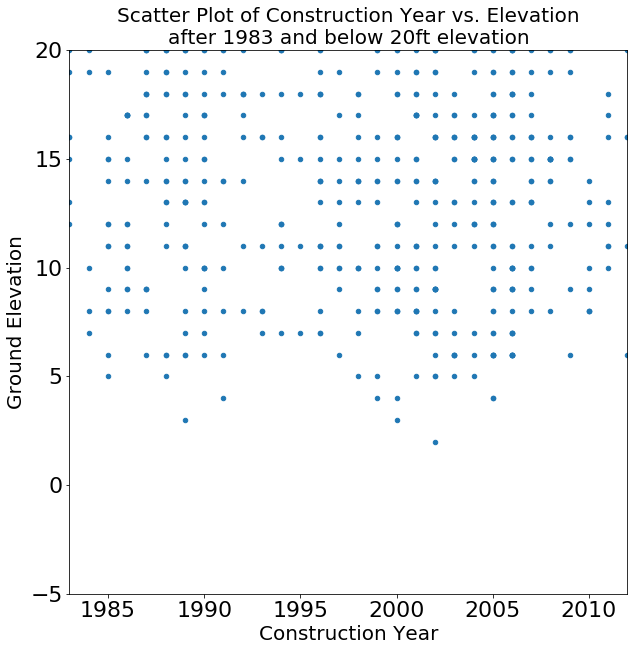

In [33]:
ax = small_buildingfootprints_dataframe.plot(kind='scatter',x='cnstrct_yr',y='groundelev',
                     marker='o', figsize=(10, 10), xlim=(1983,2012), ylim=(-5,20), fontsize=22)
yl = ax.set_ylabel("Ground Elevation", fontsize=20)
xl = ax.set_xlabel("Construction Year", fontsize=20)
ax.set_title('Scatter Plot of Construction Year vs. Elevation\nafter 1983 and below 20ft elevation', fontsize=20)

**Figure 5: Construction Year vs. Building Elevation. Analyzing buildings below 20ft.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff600c09588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff600aac208>]], dtype=object)

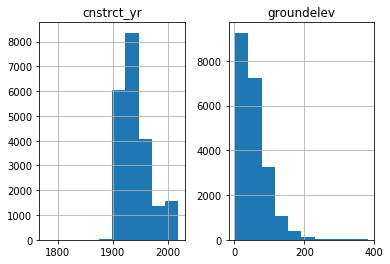

In [34]:
small_buildingfootprints_dataframe.hist()

In [35]:
elev_less_11ft = small_buildingfootprints_dataframe.loc[small_buildingfootprints_dataframe['groundelev'] < 11]

In [36]:
elev_less_11ft.head()

,cnstrct_yr,groundelev
396812,1930.0,8.0
409685,1967.0,9.0
654793,1960.0,10.0
220307,2002.0,9.0
753142,1999.0,4.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff60104c048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff600fbc978>]], dtype=object)

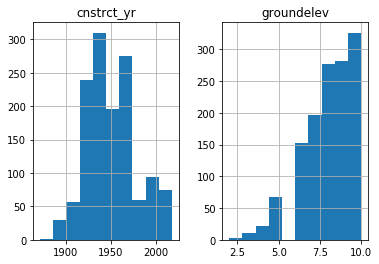

In [37]:
elev_less_11ft.hist()

Text(0.5,1,'Scatter Plot of Construction Year vs. Elevation\nbelow 11ft elevation')

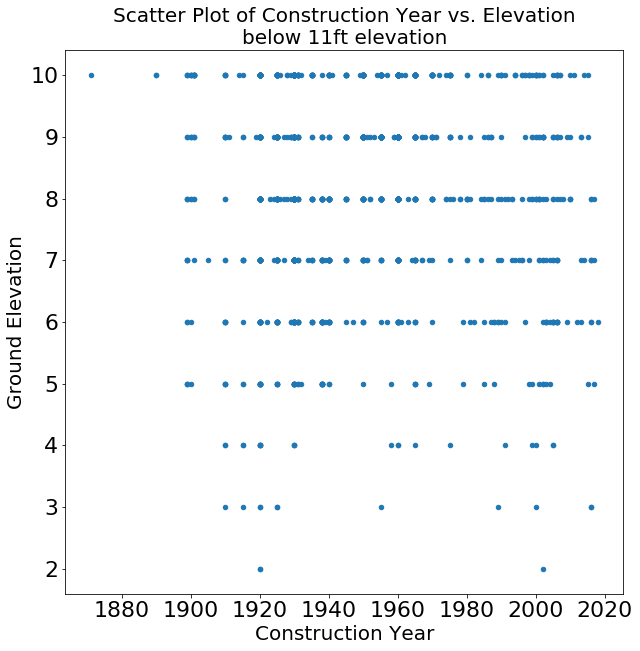

In [45]:
ax = elev_less_11ft.plot(kind='scatter',x='cnstrct_yr',y='groundelev',
                     marker='o', figsize=(10, 10), fontsize=22)
yl = ax.set_ylabel("Ground Elevation", fontsize=20)
xl = ax.set_xlabel("Construction Year", fontsize=20)
ax.set_title('Scatter Plot of Construction Year vs. Elevation\nbelow 11ft elevation', fontsize=20)

**Figure 6: Construction Year vs. Building Elevation. From FEMA's flood maps, a typical base flood elevation (BFE) in the floodplain is ~11ft. Let's analyze only buildings lower than a typical BFE.**

In [39]:
elev_less_11ft.describe()

,cnstrct_yr,groundelev
count,1335.000000,1335.000000
mean,1949.102622,8.052434
std,27.821892,1.670883
min,1871.000000,2.000000
25%,1930.000000,7.000000
50%,1947.000000,8.000000
75%,1963.500000,9.000000
max,2018.000000,10.000000


In [40]:
#Dr. Bianco's Code

In [41]:
def fit_line1(x, y):
    """Fits a line to data properly adding the dimensions required by statsmodels
    Arguments:
        x: series of exogenous variables
        y: seried of endogenous variables
    Output:
        slope, intercept of best fit line, and the full model fit
    """
    #print x
    X = sm.add_constant(x)
    #print X
    model = sm.OLS(y, X, missing='drop') # ignores entires where x or y is NaN
    fit = model.fit()
    return fit.params[1], fit.params[0], fit # could also return stderr in each via fit.bse

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             groundelev   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.159
Date:                Tue, 18 Dec 2018   Prob (F-statistic):              0.142
Time:                        14:09:36   Log-Likelihood:                -2578.0
No. Observations:                1335   AIC:                             5160.
Df Residuals:                    1333   BIC:                             5170.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.3452      3.204      1.044      0.297        -2.940     9.630
cnstrct_yr     0.0024      0.002      1.469      0.142        -0.001     0.006
==============================================================================
Omnibus:                       90.355   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.485
Skew:                          -0.698   Prob(JB):                     2.77e-24
Kurtosis:                       2.976   Cond. No.                     1.37e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

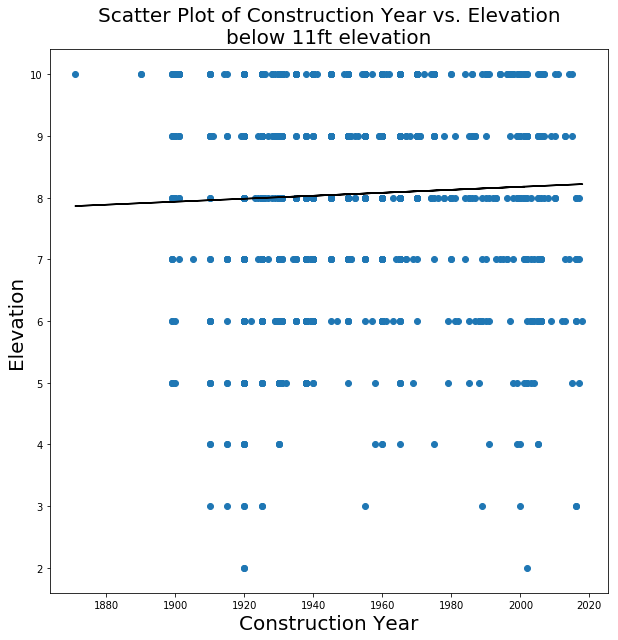

In [46]:
p1, p0, linmodel_0 = fit_line1((elev_less_11ft.cnstrct_yr), (elev_less_11ft.groundelev))
pl.figure(figsize=(10,10))
pl.scatter(elev_less_11ft.cnstrct_yr, elev_less_11ft.groundelev)
plot((elev_less_11ft.cnstrct_yr), linmodel_0.predict(), 'k')
pl.title('Scatter Plot of Construction Year vs. Elevation\nbelow 11ft elevation', fontsize=20)
xl = pl.ylabel("Elevation", fontsize=20)
yl = pl.xlabel("Construction Year", fontsize=20)
linmodel_0.summary()

**Figure 7: Construction Year vs. Building Elevation. Adding a regression line. There is a small upward slope, but this includes all years.**

In [43]:
elev_less_11ft_and_after_1983 = elev_less_11ft.loc[small_buildingfootprints_dataframe['cnstrct_yr'] > 1983]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             groundelev   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.933
Date:                Tue, 18 Dec 2018   Prob (F-statistic):             0.0884
Time:                        14:08:10   Log-Likelihood:                -383.58
No. Observations:                 189   AIC:                             771.2
Df Residuals:                     187   BIC:                             777.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         61.1105     31.182      1.960      0.052        -0.404   122.625
cnstrct_yr    -0.0267      0.016     -1.713      0.088        -0.057     0.004
==============================================================================
Omnibus:                       10.098   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.782
Skew:                          -0.570   Prob(JB):                      0.00456
Kurtosis:                       2.733   Cond. No.                     4.63e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

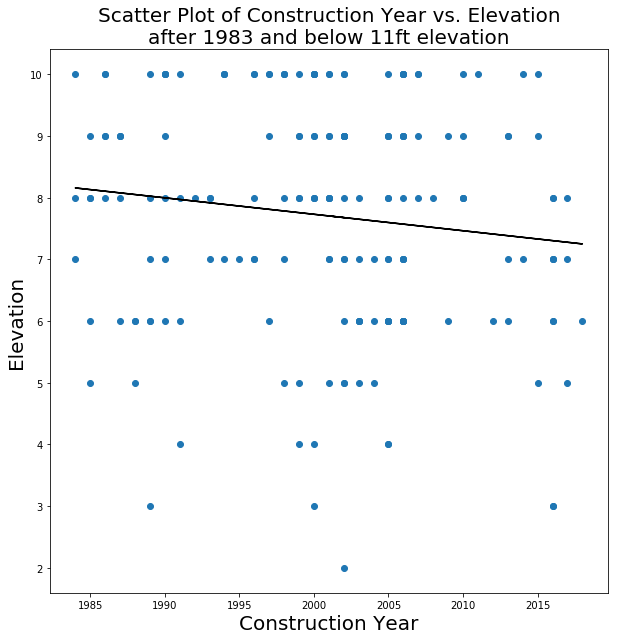

In [44]:
p1, p0, linmodel_0 = fit_line1((elev_less_11ft_and_after_1983.cnstrct_yr), (elev_less_11ft_and_after_1983.groundelev))
pl.figure(figsize=(10,10))
pl.scatter(elev_less_11ft_and_after_1983.cnstrct_yr, elev_less_11ft_and_after_1983.groundelev)
plot((elev_less_11ft_and_after_1983.cnstrct_yr), linmodel_0.predict(), 'k')
pl.title('Scatter Plot of Construction Year vs. Elevation\nafter 1983 and below 11ft elevation', fontsize=20)
xl = pl.ylabel("Elevation", fontsize=20)
yl = pl.xlabel("Construction Year", fontsize=20)
linmodel_0.summary()

**Figure 8: Construction Year vs. Building Elevation. Only analyzing buildings after 1983, we can seee that our regression line has a downward slope. Thus, NYC is not building buildings on higher elevation. Which makes them more vulnerable to floods like Sandy.**